In [2]:
import pandas as pd
import sklearn as sk
import numpy as np


In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
from matplotlib import pyplot

In [5]:
df = pd.read_csv("StartupData.csv")

In [4]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [6]:
# print([i for i in df.columns],sep="\n",end="\n")

In [8]:
X ,y = df[["Employee Count","Internet Activity Score","Team size Senior leadership"]],df["Dependent-Company Status"]

In [9]:
# def clean_column(dataframe,column_name):
    
#     """
#     Filling the empty values with median or mode if it is a number or an object(string)
#     """
        
#     if type(dataframe[column_name])== int or type(dataframe[column_name])==float:
#         imp = SimpleImputer(missing_values=0, strategy='median')
#         return imp.fit_transform(dataframe.loc[:,column_name])
        
        

In [10]:
X.head()

,Employee Count,Internet Activity Score,Team size Senior leadership
0,3.0,-1.0,2
1,NaN,125.0,4
2,14.0,455.0,7
3,45.0,-99.0,4
4,39.0,496.0,8


In [11]:
X.median()

Employee Count                 13.0
Internet Activity Score        60.0
Team size Senior leadership     3.0
dtype: float64

## Preprocessing 

In [12]:
X = X.fillna(X.median())

In [19]:
X.isnull().sum()

Employee Count                 0
Internet Activity Score        0
Team size Senior leadership    0
dtype: int64

In [30]:
le = LabelEncoder()
y = le.fit_transform(y)

## Model Building

### Decision Tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


### Random Forest

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
random_forest_clf = RandomForestClassifier(criterion="entropy")
random_forest_clf.fit(X_train,y_train)
y_pred = random_forest_clf.predict(X_test)

## Model validation

### Model Metrics(Accuracy, Precision and Recall)

In [58]:
def get_metrics(y_test,y_pred):
    print("Accuracy",accuracy_score(y_test,y_pred))
    print("Success Precision: ",precision_score(y_test,y_pred,pos_label=1))
    print("Failed Precision: ",precision_score(y_test,y_pred,pos_label=0))
    print("Success Recall: ",recall_score(y_test,y_pred))
    print("Failed Recall: ",recall_score(y_test,y_pred,pos_label=0))
    print("Confusion Matrix: \n",sk.metrics.confusion_matrix(y_test,y_pred))

### Decision Tree Metrics

In [59]:
get_metrics(y_test,y_pred)

Accuracy 0.7253521126760564
Success Precision:  0.7888888888888889
Failed Precision:  0.6153846153846154
Success Recall:  0.7802197802197802
Failed Recall:  0.6274509803921569
Confusion Matrix: 
 [[32 19]
 [20 71]]


### AUC ROC Curve

In [67]:
def AUC_ROC_Curve(clf,X_test,y_test,clf_name):
    lr_probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=clf_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.title(f"{clf_name} with 3 features")
    pyplot.show()


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.717


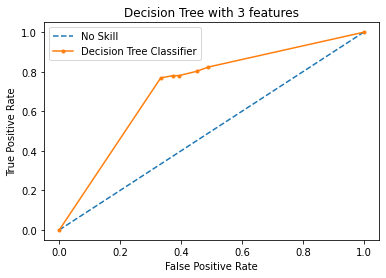

In [61]:
AUC_ROC_Curve(clf,X_test,y_test,"Decision Tree Classifier")

### Random Forest Metrics

In [64]:
get_metrics(y_test,y_pred)

Accuracy 0.7676056338028169
Success Precision:  0.79
Failed Precision:  0.7142857142857143
Success Recall:  0.8681318681318682
Failed Recall:  0.5882352941176471
Confusion Matrix: 
 [[30 21]
 [12 79]]


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.806


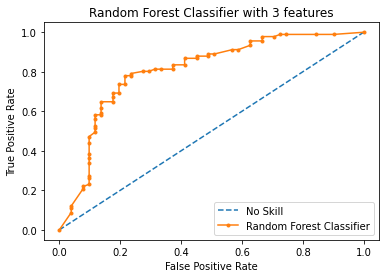

In [68]:
AUC_ROC_Curve(random_forest_clf,X_test,y_test,"Random Forest Classifier")